# Data initial exploration 
*Matthieu OLEKHNOVITCH*

## Introduction 
This notebook is dedicated to the initial exploration of the data. It is the first step of the data science process. The goal is to get a first idea of the data, to understand it and to identify the main challenges.

In [23]:
import numpy as np
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
# ----------------- Load Training Labels -----------------#

training_label_path = 'training_labels.json'
try :
    data = json.load(open(training_label_path))
except FileNotFoundError:
    print('File not found: ', training_label_path)

print(training_label_path + ' loaded')

# ----------------- Load Training Data -------------------#

training_data_path = 'training/'
discussion_ids = []
for key in data.keys():
    discussion_ids.append(key)

print('Number of discussions: ', len(discussion_ids))

# -------------------------------------------------------#

training_labels.json loaded
Number of discussions:  97


# Building a conversation graph (visualization)

In [110]:
# ------------------- Load Discussions ------------------#  

discussion_id = discussion_ids[0]                                  # Select a discussion

print('Discussion ID: ', discussion_id)
discussion_path = training_data_path + discussion_id + '.json'
try :
    discussion_json = json.load(open(discussion_path))
    print('Discussion file loaded')
    print(discussion_json)
except: 
    print('Error loading discussion file')

num_of_posts = len(discussion_json)
print('Number of posts: ', num_of_posts)

# ---------------------- Load edges ----------------------#

edges_path = training_data_path + discussion_id + '.txt'
edges = np.array(np.loadtxt(edges_path, dtype=str))
print('Number of edges: ', len(edges))



Discussion ID:  IS1003d
Discussion file loaded
[{'speaker': 'ID', 'text': 'Mm-hmm', 'index': 0}, {'speaker': 'ID', 'text': 'So , ready ?', 'index': 1}, {'speaker': 'ME', 'text': 'No not really', 'index': 2}, {'speaker': 'UI', 'text': "'Kay", 'index': 3}, {'speaker': 'ME', 'text': 'Just <disfmarker>', 'index': 4}, {'speaker': 'ME', 'text': 'Crap .', 'index': 5}, {'speaker': 'ID', 'text': '<vocalsound> Sorry ,', 'index': 6}, {'speaker': 'ID', 'text': '<vocalsound> I I um <disfmarker> <vocalsound> <vocalsound>', 'index': 7}, {'speaker': 'ME', 'text': 'Okay .', 'index': 8}, {'speaker': 'UI', 'text': "It's perfect . <vocalsound>", 'index': 9}, {'speaker': 'PM', 'text': "<vocalsound> Your judgement it's <disfmarker> is biased . <vocalsound>", 'index': 10}, {'speaker': 'ID', 'text': "I'm afraid <disfmarker> <vocalsound>", 'index': 11}, {'speaker': 'ID', 'text': 'Uh thi this remote control will stay a prototype . <vocalsound>', 'index': 12}, {'speaker': 'ME', 'text': "'Kay ,", 'index': 13}, {'

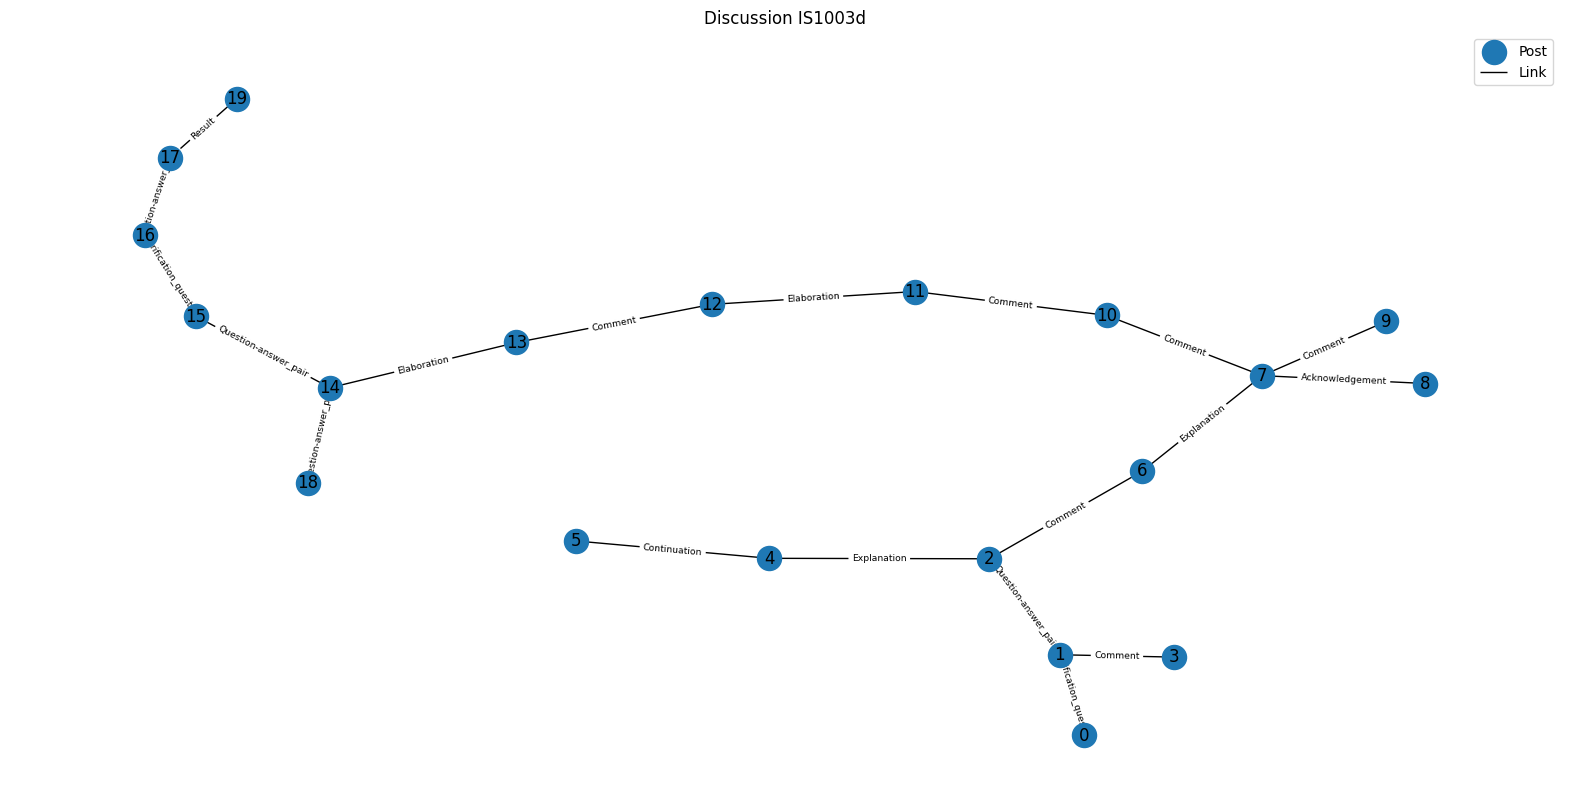

In [174]:
plt.figure(figsize=(20, 10))
plt.title('Discussion ' + discussion_id)
G = nx.Graph()
## Add nodes with labels
G.add_nodes_from(range(num_of_posts))
for i in range(num_of_posts):
    G.nodes[i]['text'] = discussion_json[i]['text']
for i in range(len(edges)):
    G.add_edge(int(edges[i, 0]), int(edges[i, 2]), type= edges[i, 1])

k = 20
G2 = G.subgraph(range(k)).copy()
pos = nx.spring_layout(G2)            
nx.draw(G2, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G2,'type')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels,font_size=30/np.sqrt(k))
plt.legend(labels=['Post', 'Link'])
plt.show()